### Data reading

In [7]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [8]:
data = pd.read_excel('test data.xlsx')

In [9]:
data

,id,doc_type,ip,fpd_first_loan,dpd_client_2months,fjs_browser_name,fjs_device,device_hash,fjs_timezone,gender,...,font_list,platform_device,email_code,type_ip,type,hash_channel_acquisition,agreement_was_issued,email_masked,mobile_phone_masked,bank_account_masked
0,31553899,x2,2402:800:6286:f8e8:450a:d1fc:2755:65cf,NaN,NaN,Chrome Mobile WebView,XiaoMi Redmi Note 8,CQHWYHwxx1FiB36rVzBN,Asia/Ho_Chi_Minh,0,...,"[""Arial"", ""Courier"", ""Courier New"", ""Georgia"",...",Linux armv8l,5.0,ISP/MOB,Application::Web,4391BFE1DA8E8C0148B9A5C089A22C88,0,***********092000@gmail.co,+84327****671,103*****549
1,31553909,x2,2001:ee0:1a1c:588f:e89f:adb7:e33e:2f45,1.0,1.0,Mobile Safari,iPhone,Upc1ESsjyi7QOUfRPp1w,Asia/Bangkok,0,...,"[""Arial"", ""Arial Hebrew"", ""Arial Rounded MT Bo...",iPhone,5.0,ISP/MOB,Application::Web,DD2BB7F2D25DB0D5654C4951596FD17A,1,*****long67@gmail.co,+84352****130,280**083
2,31554035,x2,27.68.159.13,NaN,NaN,Chrome Mobile,Generic Smartphone,8JIBoAo78lHqpydYTKkO,Asia/Ho_Chi_Minh,0,...,"[""Arial"", ""Courier"", ""Courier New"", ""Georgia"",...",Linux armv8l,5.0,ISP/MOB,Application::Web,6D5ABABB65E9FF214B73E891B4AFE6E8,0,*******tc1992@gmail.co,+84963****806,086***825
3,31554092,x1,2001:ee0:1b1:334e:1c71:e28:160d:141e,0.0,0.0,Mobile Safari UI/WKWebView,iPhone,sm0vMMJMH6LuCYPl0WNg,Asia/Bangkok,1,...,"[""Arial"", ""Arial Hebrew"", ""Arial Rounded MT Bo...",iPhone,NaN,ISP/MOB,Application::Web,6B2032052277CA56B0B3BB5A16E009F9,1,NaN,+84339****513,NaN
4,31554205,x2,2401:d800:2e71:61d0:f0a1:45fe:460a:891e,1.0,1.0,Mobile Safari,iPhone,Cn8N725keAP5oGF5h44H,Asia/Bangkok,1,...,"[""Arial"", ""Arial Hebrew"", ""Arial Rounded MT Bo...",iPhone,5.0,ISP/MOB,Application::Web,0ECC21DA2FEFBFC1A1AE375EE3F48B44,1,*****ho1990@gmail.co,+84346****825,280**881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20450,32664197,x1,2001:ee0:52f6:27d0:104:4708:9f28:cc3a,NaN,NaN,Chrome Mobile,Samsung SM-G965F,hWR9f5eDx3opxW5xsCgD,Asia/Ho_Chi_Minh,0,...,"[""Arial"", ""Courier"", ""Courier New"", ""Georgia"",...",Linux armv8l,NaN,ISP/MOB,Application::Web,4711F35B02B9417F6F5CAC32BC3D51ED,0,NaN,+84916****315,091***315
20451,32664240,x2,113.185.104.196,NaN,NaN,Chrome Mobile WebView,Generic Smartphone,jO6i96Xxw4MDgBX9LXWv,Asia/Ho_Chi_Minh,1,...,"[""Arial"", ""Courier"", ""Courier New"", ""Georgia"",...",Linux aarch64,NaN,ISP/MOB,Application::Web,C0BD39DAEA66541654EF81CFBCEF5292,0,NaN,+84346****157,530******962
20452,32664288,x2,171.240.65.77,0.0,0.0,Mobile Safari,iPhone,WJsCp2GBFM4G7yseFUqA,Asia/Bangkok,0,...,"[""Arial"", ""Arial Hebrew"", ""Arial Rounded MT Bo...",iPhone,5.0,ISP/MOB,Application::Web,C0BD39DAEA66541654EF81CFBCEF5292,1,***uy8767@gmail.co,+84962****582,432*******025
20453,32664370,x2,2401:d800:691:1c35:99fd:1c9:f2e9:9b28,NaN,NaN,Facebook,Samsung SM-A115F,B5gJlqRGxKNc0e04SRVZ,Asia/Ho_Chi_Minh,1,...,"[""Arial"", ""Courier"", ""Courier New"", ""Georgia"",...",Linux armv8l,NaN,ISP/MOB,Application::Web,9838C2BC5D370355E85C50AC86CC5A6C,0,NaN,+84365****932,102***616


In [10]:
data.shape

(20455, 37)

### Data analysis
    
    Lets look at each column to see if some of them are unnecessary for our analysis:

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20455 entries, 0 to 20454
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           20455 non-null  int64  
 1   doc_type                     20455 non-null  object 
 2   ip                           20455 non-null  object 
 3   fpd_first_loan               5592 non-null   float64
 4   dpd_client_2months           5591 non-null   float64
 5   fjs_browser_name             17663 non-null  object 
 6   fjs_device                   17663 non-null  object 
 7   device_hash                  17668 non-null  object 
 8   fjs_timezone                 17662 non-null  object 
 9   gender                       20455 non-null  int64  
 10  salary                       20455 non-null  int64  
 11  bank_id                      20455 non-null  int64  
 12  living_city_id               20455 non-null  int64  
 13  device_hash_v2  

    Let's look closer on some of them:

In [12]:
data['doc_type'].value_counts(), data['doc_type'].describe()

(x2    17796
 x1     2659
 Name: doc_type, dtype: int64,
 count     20455
 unique        2
 top          x2
 freq      17796
 Name: doc_type, dtype: object)

In [13]:
data['salary'].value_counts(), data['salary'].describe()

(10000000    3518
 8000000     2355
 12000000    2205
 15000000    2047
 9000000     1973
             ... 
 4800           1
 780000         1
 12000008       1
 7280000        1
 15000880       1
 Name: salary, Length: 265, dtype: int64,
 count    2.045500e+04
 mean     1.035237e+07
 std      5.561005e+06
 min      0.000000e+00
 25%      7.500000e+06
 50%      1.000000e+07
 75%      1.200000e+07
 max      9.900000e+07
 Name: salary, dtype: float64)

In [14]:
data['type'].value_counts(), data['type'].describe()

(Application::Web       19022
 Application::Mobile     1433
 Name: type, dtype: int64,
 count                20455
 unique                   2
 top       Application::Web
 freq                 19022
 Name: type, dtype: object)

In [15]:
data['hash_channel_acquisition'].value_counts(), data['hash_channel_acquisition'].describe()

(DEA20A430AA0B808B07B374E88B562D6    1430
 1E631541667E9579CBB480916FF60CDB    1103
 6D5ABABB65E9FF214B73E891B4AFE6E8     976
 B255BC176B1EAFA6A1AB8A92AD3DA8AC     729
 70952298F55231966CB025BF46AFE730     665
                                     ... 
 E98F5AE0E3D1434AD10AEAC3C36B33FF       1
 33E95854307E3233F0D41A2F3D52CDD9       1
 E2CF1DF17FFEAAF43D9572A5CA04933E       1
 C8434198DC0B477721C1DF303F36D966       1
 1FBCBC898BDF58AAD317C3CD2C330B0E       1
 Name: hash_channel_acquisition, Length: 1204, dtype: int64,
 count                                20455
 unique                                1204
 top       DEA20A430AA0B808B07B374E88B562D6
 freq                                  1430
 Name: hash_channel_acquisition, dtype: object)

In [16]:
data['agreement_was_issued'].value_counts(), data['agreement_was_issued'].describe()

(0    14863
 1     5592
 Name: agreement_was_issued, dtype: int64,
 count    20455.000000
 mean         0.273381
 std          0.445705
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          1.000000
 max          1.000000
 Name: agreement_was_issued, dtype: float64)

In [17]:
data['bank_account_masked'].value_counts(), data['bank_account_masked'].describe()

(190*******011    149
 190*******010     85
 190*******018     85
 190*******012     80
 190*******019     79
                 ... 
 730*******746      1
 322******234       1
 766*******200      1
 38*987             1
 914*******004      1
 Name: bank_account_masked, Length: 16947, dtype: int64,
 count             19414
 unique            16947
 top       190*******011
 freq                149
 Name: bank_account_masked, dtype: object)

In [18]:
data['email_score'].value_counts(), data['email_score'].describe()

(1.0      8178
 8.0      2365
 0.0      1187
 10.0      601
 14.0      288
 80.0      271
 4.0       190
 6.0        93
 100.0      34
 84.0       27
 24.0       14
 11.0       11
 17.0        8
 28.0        3
 12.0        3
 20.0        3
 2.0         1
 32.0        1
 Name: email_score, dtype: int64,
 count    13278.000000
 mean         5.016795
 std         12.959695
 min          0.000000
 25%          1.000000
 50%          1.000000
 75%          8.000000
 max        100.000000
 Name: email_score, dtype: float64)

In [19]:
data['type'].value_counts(), data['type'].describe()

(Application::Web       19022
 Application::Mobile     1433
 Name: type, dtype: int64,
 count                20455
 unique                   2
 top       Application::Web
 freq                 19022
 Name: type, dtype: object)

    We can say that columns which contain information about browsers, gender, hash and ip information, email, font, window size, etc. - are useless for our analysis. But anyway, we can consider such informatin as location of phone model to be useful in some way. So, let's keep these columns for now.
    
**Columns to delete:**
- id - *just id of the client*
- ip - *ip adress*
- fjs_browser_name - *browser doesn't tell anything*
- gender - *we can't make conclusions according to the gender*
- idx4_connection_markers - *useless*
- user_agent - *the same as browser*
- ua_os_name - *useless*
- window_size - *useless*
- font_list - *useless*
- platform_device - *useless*
- type_ip - *useless*
- type - *web/mobile app info, useless*
- email_masked - *useless*
- mobile_phone_masked - *useless*
- bank_account_masked - *useless*

**Columns with unobvious meaning which are needed to be explored more:**

- doc_type
- email_code
- hash_channel_acquisition
- device_hash
- device_hash_v2
- idx1_stop_markers
- idx2_user_behaviour_markers
- email_score
- phone_score

**Let's delete them:**

In [20]:
df = data.drop(['id', 'ip', 'fjs_browser_name', 'gender', 'idx4_connection_markers', 'user_agent', 'ua_os_name',  'window_size', 'font_list', 'platform_device', 'type_ip', 'type', 'email_masked', 'mobile_phone_masked', 'bank_account_masked'], axis=1)
df

,doc_type,fpd_first_loan,dpd_client_2months,fjs_device,device_hash,fjs_timezone,salary,bank_id,living_city_id,device_hash_v2,...,idx3_device_markers,geo_latitude,geo_longitude,created_at,completed_at,email_score,phone_score,email_code,hash_channel_acquisition,agreement_was_issued
0,x2,NaN,NaN,XiaoMi Redmi Note 8,CQHWYHwxx1FiB36rVzBN,Asia/Ho_Chi_Minh,13000000,3,34,2.302042e+16,...,0.0,14.672403,109.069422,2023-02-27 06:29:01.6942380,2023-02-27 06:33:33.6971430,8.0,0.0,5.0,4391BFE1DA8E8C0148B9A5C089A22C88,0
1,x2,1.0,1.0,iPhone,Upc1ESsjyi7QOUfRPp1w,Asia/Bangkok,25000000,11,40,2.302271e+16,...,1.0,NaN,NaN,2023-02-27 06:29:19.2176260,2023-02-27 06:52:39.8145980,1.0,0.0,5.0,DD2BB7F2D25DB0D5654C4951596FD17A,1
2,x2,NaN,NaN,Generic Smartphone,8JIBoAo78lHqpydYTKkO,Asia/Ho_Chi_Minh,10000000,14,39,2.301161e+16,...,0.0,10.505657,108.949515,2023-02-27 06:33:11.0393760,2023-02-27 06:39:12.7263290,0.0,0.0,5.0,6D5ABABB65E9FF214B73E891B4AFE6E8,0
3,x1,0.0,0.0,iPhone,sm0vMMJMH6LuCYPl0WNg,Asia/Bangkok,10000000,11,31,2.302271e+16,...,0.0,NaN,NaN,2023-02-27 06:35:04.6280210,2023-02-27 06:49:34.3345930,NaN,0.0,NaN,6B2032052277CA56B0B3BB5A16E009F9,1
4,x2,1.0,1.0,iPhone,Cn8N725keAP5oGF5h44H,Asia/Bangkok,25000000,11,46,2.302271e+16,...,1.0,NaN,NaN,2023-02-27 06:39:29.9453060,2023-02-27 06:45:03.2071150,0.0,0.0,5.0,0ECC21DA2FEFBFC1A1AE375EE3F48B44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20450,x1,NaN,NaN,Samsung SM-G965F,hWR9f5eDx3opxW5xsCgD,Asia/Ho_Chi_Minh,8000000,14,63,2.301061e+16,...,0.0,NaN,NaN,2023-04-10 09:28:45.5095550,2023-04-10 09:37:12.8117060,NaN,0.0,NaN,4711F35B02B9417F6F5CAC32BC3D51ED,0
20451,x2,NaN,NaN,Generic Smartphone,jO6i96Xxw4MDgBX9LXWv,Asia/Ho_Chi_Minh,12000000,1,43,2.304121e+16,...,1.0,12.399219,107.613082,2023-04-10 09:30:32.0142560,2023-04-12 11:00:07.4152530,NaN,0.0,NaN,C0BD39DAEA66541654EF81CFBCEF5292,0
20452,x2,0.0,0.0,iPhone,WJsCp2GBFM4G7yseFUqA,Asia/Bangkok,15000000,2,18,2.304101e+16,...,1.0,NaN,NaN,2023-04-10 09:31:54.9979250,2023-04-10 09:36:30.8956520,1.0,0.0,5.0,C0BD39DAEA66541654EF81CFBCEF5292,1
20453,x2,NaN,NaN,Samsung SM-A115F,B5gJlqRGxKNc0e04SRVZ,Asia/Ho_Chi_Minh,15000000,4,51,2.304101e+16,...,1.0,NaN,NaN,2023-04-10 09:35:10.3764200,2023-04-10 09:40:46.4908760,NaN,0.0,NaN,9838C2BC5D370355E85C50AC86CC5A6C,0


**Let's look at some correlations (only numeric values) on the heatmap plot and compare if important correlation was lost after deleting these columns or not**
    
    Old data with all columns:

<Axes: >

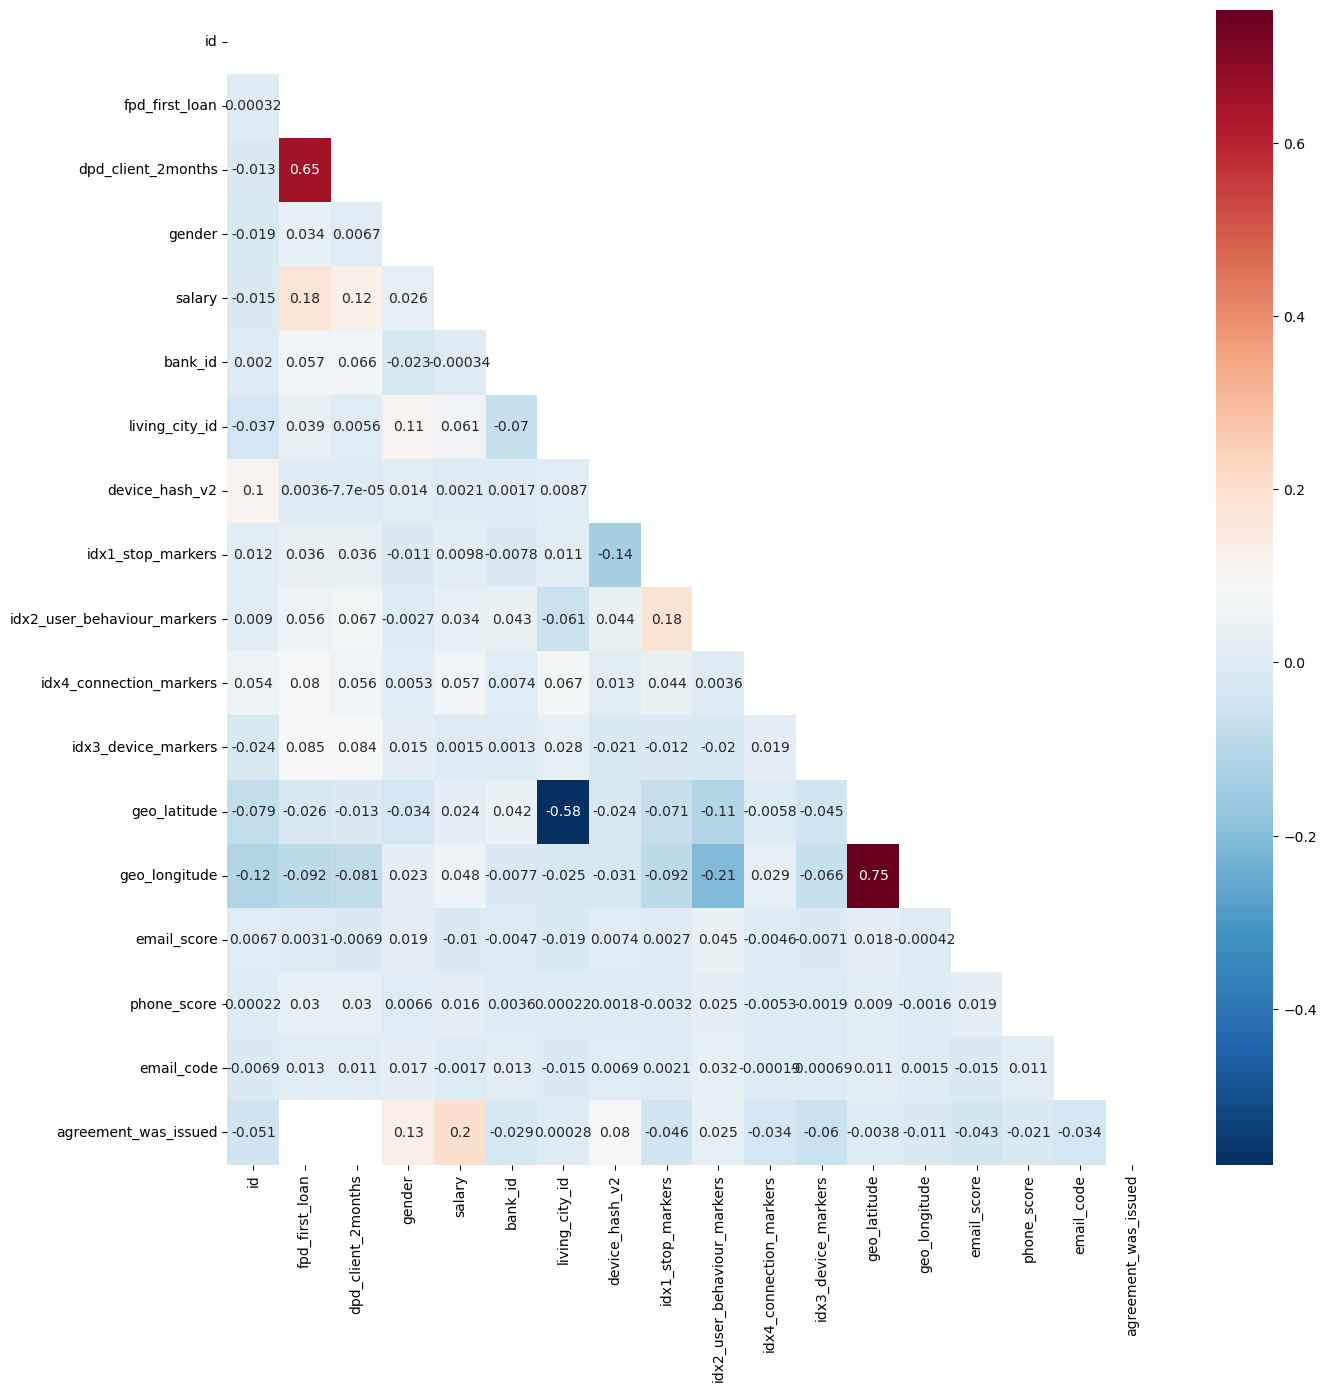

In [21]:
plt.figure(figsize=(15,15))
corr = data.corr(numeric_only=True)
msk = np.triu(np.ones_like(corr))
sns.heatmap(corr,cmap=plt.cm.RdBu_r,annot=True,annot_kws={'size':10},mask=msk)

    New dataframe (df) after deletion columns:

<Axes: >

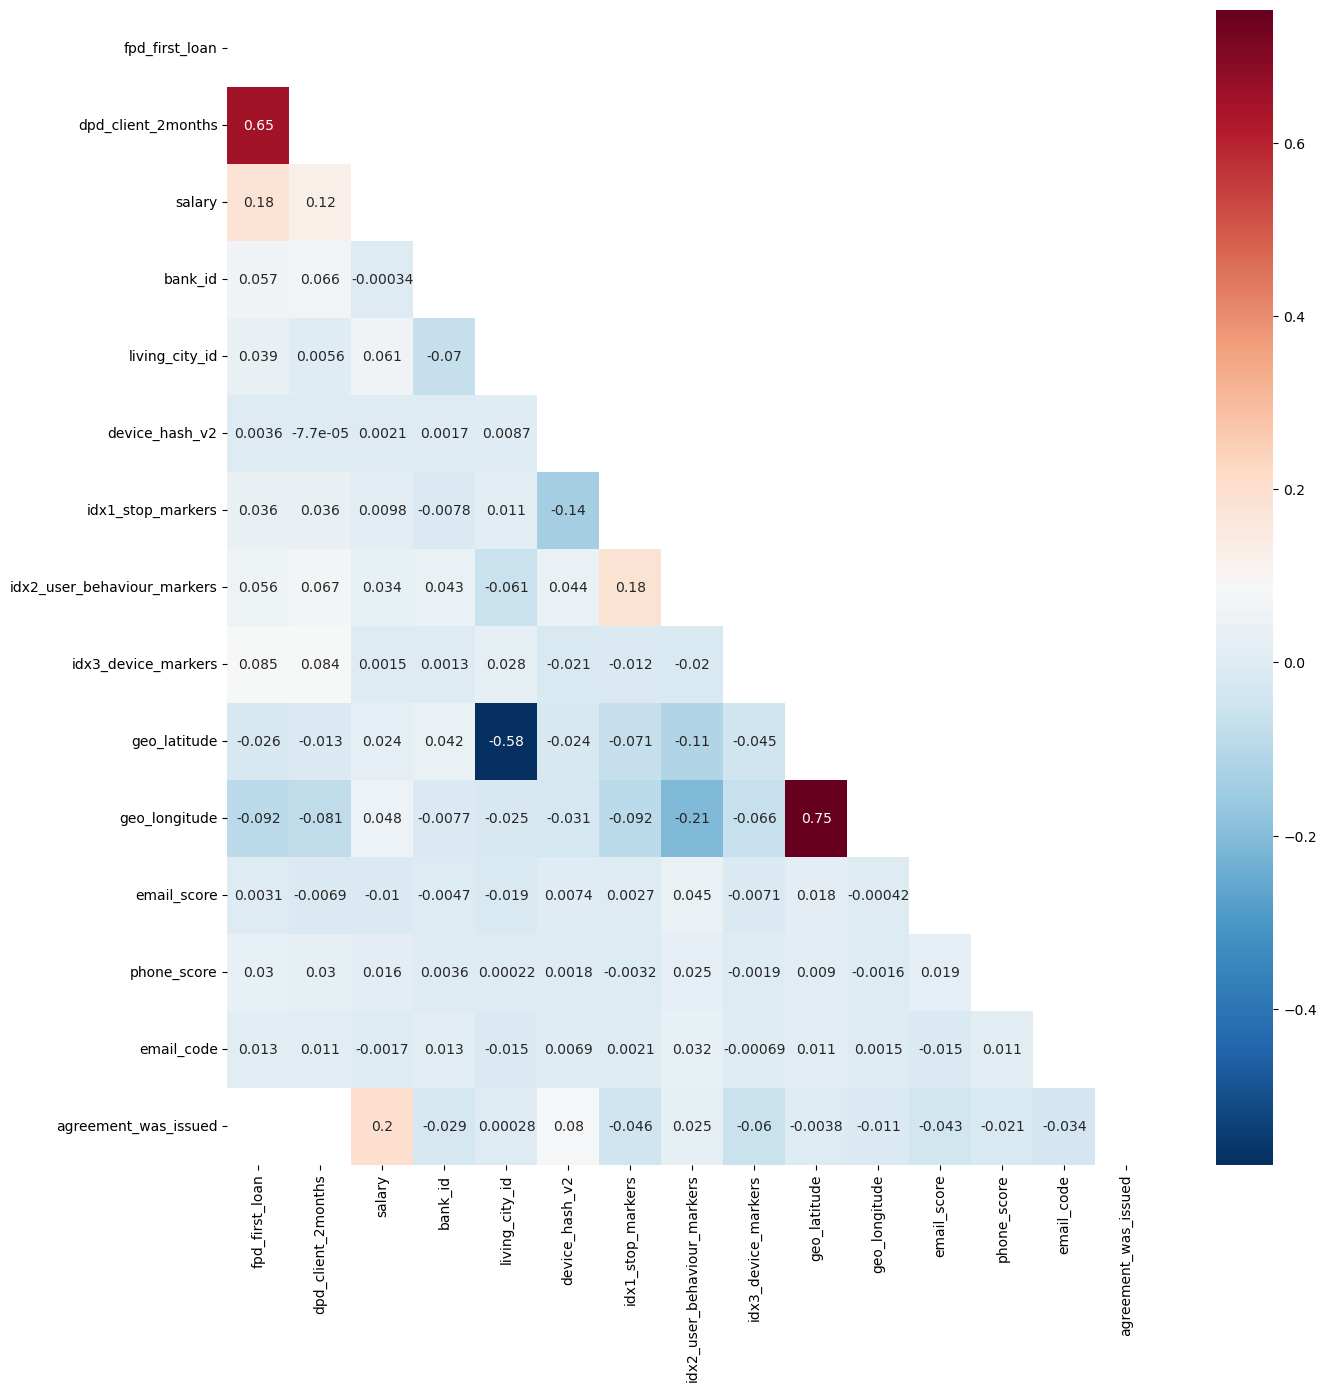

In [22]:
plt.figure(figsize=(15,15))
corr = df.corr(numeric_only=True)
msk = np.triu(np.ones_like(corr))
sns.heatmap(corr,cmap=plt.cm.RdBu_r,annot=True,annot_kws={'size':10},mask=msk)

    We see, that we didn't lose any of interesting correlations after dropping some useless columns.   
    Now let's look at these correlations closer, starting from the top:
    
    1) Dependence between client's first loan default and client's default on the first two months is very high - it tells us that there is a big chance, if client had a default on his first credit, it will happen again.
    2) Salary has not so big influence on the default by the way, although we could intuitvely think otherwise. But we should take it into account anyway.
    3) We have correlation between living_city_id and geo_latitude, and also between geo_latitude and geo_longtitude, which is quite logical, but doesn't give additional information.
    4) However, we have some corellation with the values of geoposition and behaviour markers, as far as behaviour markers and stop markers. We should explore it deeper.
    
    Now let's look at dependence on some unobvious metrics and loan default (assuming that 1 - client had default, 0 - he didn't):

In [23]:
# doc_type - nothing special

data[['doc_type', 'dpd_client_2months']].value_counts()

doc_type  dpd_client_2months
x2        0.0                   2517
          1.0                   2372
x1        0.0                    358
          1.0                    344
dtype: int64

In [24]:
# fjs_device - nothing special (expected cheap phone to have bad statistics, but it's not)

pd.set_option('display.max_rows', None)
df[['fjs_device', 'dpd_client_2months']].value_counts()

fjs_device                               dpd_client_2months
iPhone                                   1.0                   1505
                                         0.0                   1447
Generic Smartphone                       0.0                    566
                                         1.0                    475
Other                                    0.0                     50
                                         1.0                     33
Samsung SM-A125F                         0.0                     19
Samsung SM-A325F                         0.0                     17
Samsung SM-A515F                         0.0                     17
Samsung SM-A235F                         1.0                     16
                                         0.0                     15
Samsung SM-A135F                         1.0                     15
Samsung SM-A505F                         0.0                     15
Samsung SM-G610F                         1.0            

In [25]:
pd.reset_option('display.max_rows') # Reseting the previous setting

In [26]:
# email_code - nothing special

metrics = df.groupby('email_code')['dpd_client_2months'].value_counts().copy()
print(metrics)

email_code  dpd_client_2months
0.0         0.0                      2
            1.0                      2
3.0         0.0                     23
            1.0                     15
4.0         0.0                      2
            1.0                      1
5.0         0.0                   2140
            1.0                   2132
6.0         0.0                    110
            1.0                    104
7.0         1.0                      9
            0.0                      6
Name: dpd_client_2months, dtype: int64


In [27]:
# geo_latitude - nothing special

metrics = df.groupby('geo_latitude')['dpd_client_2months'].value_counts().copy()
print(metrics)

geo_latitude  dpd_client_2months
0.009254      1.0                   1
0.009303      0.0                   1
0.009305      1.0                   1
0.009416      1.0                   1
0.009462      0.0                   1
                                   ..
22.876767     0.0                   1
23.003421     0.0                   1
23.205292     1.0                   1
23.224758     1.0                   1
36.236360     1.0                   1
Name: dpd_client_2months, Length: 2475, dtype: int64


In [28]:
# geo_longitude - nothing special

metrics = df.groupby('geo_longitude')['dpd_client_2months'].value_counts().copy()
print(metrics)

geo_longitude  dpd_client_2months
0.103376       1.0                   1
0.103954       1.0                   1
0.104298       0.0                   1
0.104690       0.0                   1
0.104988       1.0                   1
                                    ..
109.318850     0.0                   1
109.323079     1.0                   1
109.334533     0.0                   1
109.428902     0.0                   1
139.206490     1.0                   1
Name: dpd_client_2months, Length: 2479, dtype: int64


In [29]:
''' email_code - we can see that for values 5, 1 and 2 we have some difference between having a loan default and not.
Although for values 25, 12, 4 ad 6 the trend is not so obvious, anyway it can be a signal that 
this mertics shows client's paying capacity. '''

metrics = df.groupby('idx1_stop_markers')['dpd_client_2months'].value_counts().copy()
print(metrics)

idx1_stop_markers  dpd_client_2months
0.0                0.0                   2750
                   1.0                   2519
1.0                1.0                    113
                   0.0                     82
2.0                1.0                     51
                   0.0                     26
3.0                0.0                      3
                   1.0                      3
4.0                0.0                      4
                   1.0                      4
5.0                1.0                     10
                   0.0                      2
6.0                1.0                      7
                   0.0                      6
12.0               1.0                      2
                   0.0                      1
25.0               0.0                      1
Name: dpd_client_2months, dtype: int64


In [30]:
''' email_code - here we have a trend to those clients who have big behaviour markers, 
the statistics of loan defaults are raising. It means - the bigger markers - the worse client's reliability'''

metrics1 = df.groupby('idx2_user_behaviour_markers')['dpd_client_2months'].value_counts().copy()
metrics2 = df.groupby('idx2_user_behaviour_markers')['fpd_first_loan'].value_counts().copy()
print(metrics1, metrics2)

idx2_user_behaviour_markers  dpd_client_2months
0.0                          0.0                     33
                             1.0                     30
1.0                          0.0                    224
                             1.0                    172
2.0                          0.0                    491
                             1.0                    359
3.0                          0.0                   1389
                             1.0                   1335
4.0                          1.0                    560
                             0.0                    536
5.0                          1.0                    208
                             0.0                    177
6.0                          1.0                     45
                             0.0                     25
Name: dpd_client_2months, dtype: int64 idx2_user_behaviour_markers  fpd_first_loan
0.0                          0.0                 41
                             1.0 

In [31]:
'''email_score - Probably this metrics counts the number of emails recieved from client. And we see, that often -
the more emails client send - the worse his statistics. So, this metrics also can be important'''

metrics1 = df.groupby('email_score')['dpd_client_2months'].value_counts().copy()
metrics2 = df.groupby('email_score')['fpd_first_loan'].value_counts().copy()
print(metrics1, metrics2)

email_score  dpd_client_2months
0.0          0.0                    390
             1.0                    263
1.0          0.0                   1454
             1.0                   1367
2.0          1.0                      1
4.0          0.0                     32
             1.0                     30
6.0          1.0                     23
             0.0                     15
8.0          1.0                    407
             0.0                    233
10.0         1.0                    110
             0.0                     67
11.0         0.0                      2
             1.0                      1
12.0         0.0                      1
14.0         0.0                     23
             1.0                     21
17.0         0.0                      1
24.0         0.0                      3
             1.0                      1
28.0         1.0                      1
80.0         0.0                     51
             1.0                     31
84.0    

In [32]:
'''phone_score - and the similar situation with phone calls. So, it can be "annoying" clients, or even scammers.
This metric is also important'''

metrics1 = df.groupby('phone_score')['dpd_client_2months'].value_counts().copy()
metrics2 = df.groupby('phone_score')['fpd_first_loan'].value_counts().copy()
print(metrics1, metrics2)

phone_score  dpd_client_2months
0.0          0.0                   2799
             1.0                   2615
1.0          1.0                     81
             0.0                     61
4.0          1.0                     19
             0.0                     12
Name: dpd_client_2months, dtype: int64 phone_score  fpd_first_loan
0.0          0.0               3232
             1.0               2183
1.0          1.0                 72
             0.0                 70
4.0          1.0                 16
             0.0                 15
Name: fpd_first_loan, dtype: int64


In [33]:
'''fjs_timezone - Here we see the trend - clients from Ho Chi Minh has some bad statistics if we compare each value. 
It will be (1421/1421+977)*100 = 59% of clients from here have default on the first 2 months. '''

metrics1 = df.groupby('fjs_timezone')['dpd_client_2months'].value_counts().copy()
metrics2 = df.groupby('fjs_timezone')['fpd_first_loan'].value_counts().copy()
print(metrics1, metrics2)

fjs_timezone      dpd_client_2months
Asia/Bangkok      1.0                   1403
                  0.0                   1102
Asia/Ho_Chi_Minh  0.0                   1421
                  1.0                    977
Asia/Singapore    1.0                      4
                  0.0                      2
Name: dpd_client_2months, dtype: int64 fjs_timezone      fpd_first_loan
Asia/Bangkok      0.0               1301
                  1.0               1204
Asia/Ho_Chi_Minh  0.0               1609
                  1.0                789
Asia/Singapore    0.0                  4
                  1.0                  2
Name: fpd_first_loan, dtype: int64


In [34]:
'''bank_id - here we see that a lot of clients from bank "11" has a very bad statistics. 
Very important information for agreement / disagreement for the loans.'''

metrics1 = df.groupby('bank_id')['dpd_client_2months'].value_counts().copy()
metrics2 = df.groupby('bank_id')['fpd_first_loan'].value_counts().copy()
print(metrics1, metrics2)

bank_id  dpd_client_2months
1        0.0                   184
         1.0                   177
2        0.0                   287
         1.0                   172
3        0.0                   321
         1.0                   242
4        0.0                   575
         1.0                   420
5        0.0                   225
         1.0                   156
6        0.0                    91
         1.0                    73
7        0.0                     2
         1.0                     2
8        0.0                   197
         1.0                   159
9        0.0                     4
         1.0                     1
10       0.0                     4
         1.0                     3
11       1.0                   536
         0.0                   123
12       0.0                    12
         1.0                     9
14       0.0                   619
         1.0                   605
15       0.0                    18
         1.0               

In [35]:
'''living_city_id - Here we also can analyze the reliability of clients by the city.'''

pd.set_option('display.max_rows', None)
metrics1 = df.groupby('living_city_id')['dpd_client_2months'].value_counts().copy()
metrics2 = df.groupby('living_city_id')['fpd_first_loan'].value_counts().copy()
print(metrics1, metrics2)

living_city_id  dpd_client_2months
1               0.0                   404
                1.0                   300
2               1.0                    13
                0.0                     5
3               1.0                     9
                0.0                     6
4               1.0                     8
                0.0                     7
5               1.0                    23
                0.0                    12
6               0.0                    15
                1.0                    15
7               1.0                     7
                0.0                     6
8               1.0                     3
                0.0                     2
9               1.0                    16
                0.0                    11
10              1.0                    19
                0.0                     9
11              1.0                    18
                0.0                     9
12              1.0                    36

In [36]:
'''hash_channel_acquisition - this metrics, probably, tells us where client found the company 
(advertisement on the interner, or, friends recommendation). But as far as there are so many different values,
it also can be some technical properties. Anyway, this mertics is quite useful (for example values 129/3)'''

metrics1 = df.groupby('hash_channel_acquisition')['dpd_client_2months'].value_counts().copy()
metrics2 = df.groupby('hash_channel_acquisition')['fpd_first_loan'].value_counts().copy()
print(metrics1, metrics2)

hash_channel_acquisition          dpd_client_2months
002E8CF28C710B97C585E7E55E7191B8  0.0                     2
                                  1.0                     2
0031DF088250A69FBD46C3CF7A840872  0.0                     1
00753DCFE9BBBC4B0DFADE5BB1033F35  1.0                     1
00D7A9E6D57126D92A7B5E58865DFAB8  1.0                     1
00DFB13E31C435A96794175E7A66C2E5  0.0                    12
                                  1.0                    12
00F956F9C4B13C3576F16BB2F248F596  1.0                     1
0150C1922B78DBCF41D0D29924C57AA2  0.0                     7
                                  1.0                     4
01788C4EF0BC49C6991C8559AE9A4FFD  0.0                    55
                                  1.0                    21
01F9A181269FA9ABDDFCD2C6C1763F30  0.0                     4
                                  1.0                     1
029767B2AD5799296971EF1802ABB21A  1.0                     3
                                  0.0          

Name: dpd_client_2months, dtype: int64 hash_channel_acquisition          fpd_first_loan
002E8CF28C710B97C585E7E55E7191B8  0.0                 4
0031DF088250A69FBD46C3CF7A840872  0.0                 1
00753DCFE9BBBC4B0DFADE5BB1033F35  1.0                 1
00D7A9E6D57126D92A7B5E58865DFAB8  1.0                 1
00DFB13E31C435A96794175E7A66C2E5  0.0                16
                                  1.0                 8
00F956F9C4B13C3576F16BB2F248F596  0.0                 1
0150C1922B78DBCF41D0D29924C57AA2  0.0                 9
                                  1.0                 2
01788C4EF0BC49C6991C8559AE9A4FFD  0.0                56
                                  1.0                20
01F9A181269FA9ABDDFCD2C6C1763F30  0.0                 4
                                  1.0                 1
029767B2AD5799296971EF1802ABB21A  0.0                 2
                                  1.0                 2
02DA02BC22A2E08E7FA05541C8B32419  1.0                 1
03A235F5FF37EA0C

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20455 entries, 0 to 20454
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   doc_type                     20455 non-null  object 
 1   fpd_first_loan               5592 non-null   float64
 2   dpd_client_2months           5591 non-null   float64
 3   fjs_device                   17663 non-null  object 
 4   device_hash                  17668 non-null  object 
 5   fjs_timezone                 17662 non-null  object 
 6   salary                       20455 non-null  int64  
 7   bank_id                      20455 non-null  int64  
 8   living_city_id               20455 non-null  int64  
 9   device_hash_v2               20310 non-null  float64
 10  idx1_stop_markers            20310 non-null  float64
 11  idx2_user_behaviour_markers  20310 non-null  float64
 12  idx3_device_markers          20310 non-null  float64
 13  geo_latitude    

    Now, according to the analysis, we can delete more values for our model:
    
**Columns to delete:**
- doc_type (usage case wasn't found)
- fjs_device (string value)
- device_hash (string value)
- email_code (usage case wasn't found)
- fjs_timezone (string value)
- created_at 
- device_hash_v2 (string value)
- completed_at
- hash_channel_acquisition (string value)
- agreement_was_issued (always value = 1)
- geo_latitude (usage case wasn't found)
- geo_longitude (usage case wasn't found)

**created_at** and **completed_at** can be used next time to check difference in time and its dependence to reliability, but now we will delete them.

In [38]:
pd.reset_option('display.max_rows') # Reseting the previous setting

In [39]:
df = df.drop(['doc_type', 'fjs_device', 'device_hash', 'email_code', 'fjs_timezone', 'created_at', 'device_hash_v2', 'completed_at', 'hash_channel_acquisition',  'agreement_was_issued', 'geo_latitude', 'geo_longitude'], axis=1)
df

,fpd_first_loan,dpd_client_2months,salary,bank_id,living_city_id,idx1_stop_markers,idx2_user_behaviour_markers,idx3_device_markers,email_score,phone_score
0,NaN,NaN,13000000,3,34,0.0,2.0,0.0,8.0,0.0
1,1.0,1.0,25000000,11,40,0.0,4.0,1.0,1.0,0.0
2,NaN,NaN,10000000,14,39,0.0,3.0,0.0,0.0,0.0
3,0.0,0.0,10000000,11,31,0.0,4.0,0.0,NaN,0.0
4,1.0,1.0,25000000,11,46,0.0,5.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20450,NaN,NaN,8000000,14,63,0.0,3.0,0.0,NaN,0.0
20451,NaN,NaN,12000000,1,43,0.0,3.0,1.0,NaN,0.0
20452,0.0,0.0,15000000,2,18,0.0,4.0,1.0,1.0,0.0
20453,NaN,NaN,15000000,4,51,0.0,4.0,1.0,NaN,0.0


### Building a model

    Now let's try to build the model, which will predict if the client will have default of his first loan. The metrics dpd_client_2months will show very explicitly our target data, so we will try not to use it.

In [40]:
df.dropna(subset=['fpd_first_loan'], inplace=True)
df.dropna(subset=['idx1_stop_markers', 'idx2_user_behaviour_markers', 'idx3_device_markers',
                  'email_score', 'phone_score'], inplace=True)

In [41]:
x = df.iloc[:, 1:]
y = df['fpd_first_loan']

In [42]:
x.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4540 entries, 1 to 20452
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   dpd_client_2months           4539 non-null   float64
 1   salary                       4540 non-null   int64  
 2   bank_id                      4540 non-null   int64  
 3   living_city_id               4540 non-null   int64  
 4   idx1_stop_markers            4540 non-null   float64
 5   idx2_user_behaviour_markers  4540 non-null   float64
 6   idx3_device_markers          4540 non-null   float64
 7   email_score                  4540 non-null   float64
 8   phone_score                  4540 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 354.7 KB
<class 'pandas.core.series.Series'>
Int64Index: 4540 entries, 1 to 20452
Series name: fpd_first_loan
Non-Null Count  Dtype  
--------------  -----  
4540 non-null   float64
dtypes: float64(1)
memory usag

(None, None)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [44]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [45]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
inputs = x_train.shape[1:]

model = keras.Sequential([
    keras.layers.Dense(512, input_shape=inputs, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [47]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [48]:
model_info = model.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
114/114 [==============================] - 1s 2ms/step - loss: nan - binary_accuracy: 0.7786
Epoch 2/100
114/114 [==============================] - 0s 2ms/step - loss: nan - binary_accuracy: 0.5829
Epoch 3/100
114/114 [==============================] - 0s 2ms/step - loss: nan - binary_accuracy: 0.5829
Epoch 4/100
114/114 [==============================] - 0s 2ms/step - loss: nan - binary_accuracy: 0.5829
Epoch 5/100
114/114 [==============================] - 0s 2ms/step - loss: nan - binary_accuracy: 0.5829
Epoch 6/100
114/114 [==============================] - 0s 2ms/step - loss: nan - binary_accuracy: 0.5829
Epoch 7/100
114/114 [==============================] - 0s 2ms/step - loss: nan - binary_accuracy: 0.5829
Epoch 8/100
114/114 [==============================] - 0s 2ms/step - loss: nan - binary_accuracy: 0.5829
Epoch 9/100
114/114 [==============================] - 0s 2ms/step - loss: nan - binary_accuracy: 0.5829
Epoch 10/100
114/114 [==============================] -

114/114 [==============================] - 0s 2ms/step - loss: nan - binary_accuracy: 0.5829
Epoch 79/100
114/114 [==============================] - 0s 2ms/step - loss: nan - binary_accuracy: 0.5829
Epoch 80/100
114/114 [==============================] - 0s 2ms/step - loss: nan - binary_accuracy: 0.5829
Epoch 81/100
114/114 [==============================] - 0s 2ms/step - loss: nan - binary_accuracy: 0.5829
Epoch 82/100
114/114 [==============================] - 0s 2ms/step - loss: nan - binary_accuracy: 0.5829
Epoch 83/100
114/114 [==============================] - 0s 2ms/step - loss: nan - binary_accuracy: 0.5829
Epoch 84/100
114/114 [==============================] - 0s 2ms/step - loss: nan - binary_accuracy: 0.5829
Epoch 85/100
114/114 [==============================] - 0s 3ms/step - loss: nan - binary_accuracy: 0.5829
Epoch 86/100
114/114 [==============================] - 0s 3ms/step - loss: nan - binary_accuracy: 0.5829
Epoch 87/100
114/114 [==============================] - 0s 

In [49]:
model.evaluate(x_test, y_test)

29/29 [==============================] - 0s 1ms/step - loss: nan - binary_accuracy: 0.5903


[nan, 0.5903083682060242]

    Looks like we have an overfitting problem. So, we need to choose some other parameters to increase accuracy. Let's now try to also use the metrics dpd_client_2months:

### Conclusions

    During our analysis, we noticed that even simple things, like city or bank_id, can be used for preventing fraud cases and analyze better if the client reliable enough to get a loan or not.
    The model that was built gives not very good results on testing sets, so, we need to explore the problem more presicely to understand what parameters can we add or what approaches can be changed for increasing accuracy. We also can try to fit such values as hash_channel_acquisition, fjs_timezone, created_at, complited_at and others - to be used in our model in further cases.
    One of the most useful information (except, of course, information about load defaults) is markers. Indeed, we can use unobvious paramenerts to increase / decrease markers' values to use them further in our predictions of clients behaviour.